## import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

## 1. Importing the dataset and combining the data

In [2]:
claim = pd.read_csv(r"C:\Users\MAGICPIN\Desktop\p\assign\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv")
cust = pd.read_csv(r"C:\Users\MAGICPIN\Desktop\p\assign\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust_final = pd.merge(left =cust , right = claim, how = 'inner' , left_on =  'CUST_ID' , right_on = 'customer_id')
cust_final.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


## 2. Perform a data audit for the datatypes and find out if there are any  mismatch within the current datatypes of the columns and their business significance.
## 3. Convert the column claim_amount to numeric. Use the appropriatemodules/attributes to remove the $ sign.

In [3]:
cust_final.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [4]:
cust_final["DateOfBirth"] = pd.to_datetime(cust_final.DateOfBirth, format = "%d-%b-%y")
cust_final.loc[(cust_final.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_final[cust_final.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
cust_final["claim_date"] = pd.to_datetime(cust_final.claim_date, format = "%m/%d/%Y")
cust_final["Contact"] = pd.to_numeric(cust_final.Contact.str.replace("-",""),downcast='float')
cust_final["claim_amount"] = pd.to_numeric(cust_final.claim_amount.str.replace("$",""),downcast='float')
cust_final.head(2)

C:\Users\MAGICPIN\AppData\Local\Temp/ipykernel_3384/2741387972.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_final["claim_amount"] = pd.to_numeric(cust_final.claim_amount.str.replace("$",""),downcast='float')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


In [5]:
cust_final.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float32
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [6]:
cust_final.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes


In [7]:
cust_final["flag"] = np.where(cust_final.police_report  == 'No', 0 ,1 )
cust_final["flag"] = np.where(cust_final["police_report"] == 'Unknown' , np.nan , cust_final["flag"])

In [8]:
cust_final.drop(columns = ["police_report"], inplace = True)

## 5. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column

In [9]:
cust_final = cust_final.groupby('CUST_ID').first().reset_index(drop = True)

## 6. Check for missing values and impute the missing values with anappropriate value. (mean for continuous and mode for categorical)

In [10]:
cust_final["incident_cause"].isna().sum()

0

In [11]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_col = ["claim_amount"]

In [12]:
for col in cat_col:
    cust_final[col] = cust_final[col].fillna(cust_final[col].mode()[0])
cust_final[con_col] = cust_final[con_col].fillna(cust_final[con_col].mean())
cust_final.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,154557,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,263204,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,441097,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,524545,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0


In [13]:
cust_final["State"].isna().sum()

0

## 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
Children < 18 , Youth 18-30 , Adult 30-60 , Senior > 60

In [14]:
cust_final

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,154557,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,263204,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,441097,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,524545,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Male,1965-01-28,UT,5.175625e+09,Silver,4549014,99674324,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,0.0
1074,Female,1966-06-19,HI,4.577521e+09,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1.0
1075,Female,1963-11-18,NC,6.432465e+09,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,0.0
1076,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,99892000,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,0.0


In [15]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(cust_final['DateOfBirth']).year          
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
cust_final['age'] = (np.where(dob_year > curr_year,v,y))
#Categorising
cust_final.loc[(cust_final.age < 18),'AgeGroup'] = 'Children'
cust_final.loc[(cust_final.age >=18) & (cust_final.age <30),'AgeGroup'] = 'Youth'
cust_final.loc[(cust_final.age >=30) & (cust_final.age <60),'AgeGroup'] = 'Adult'
cust_final.loc[(cust_final.age >=60),'AgeGroup'] = 'Senior'

In [16]:
cust_final

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,AgeGroup
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,154557,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,44,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,263204,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,50,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,34,Adult
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,441097,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,51,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,524545,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,42,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Male,1965-01-28,UT,5.175625e+09,Silver,4549014,99674324,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,0.0,57,Adult
1074,Female,1966-06-19,HI,4.577521e+09,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1.0,56,Adult
1075,Female,1963-11-18,NC,6.432465e+09,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,0.0,59,Adult
1076,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,99892000,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,0.0,27,Youth


## 8. What is the average amount claimed by the customers from various segments?

In [17]:
cust_final[["Segment", "claim_amount"]].groupby('Segment').mean()

,claim_amount
Segment,
Gold,12756.479492
Platinum,12369.304688
Silver,12269.435547


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [18]:
cust_final[cust_final.claim_date < '2018-10-08'].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                  736132.5
Driver error          3323137.0
Natural causes        1364550.5
Other causes          3973955.5
Other driver error    3432766.0
Name: claim_amount, dtype: float32

## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [19]:
cust_final.loc[(cust_final.incident_cause.str.lower().str.contains("driver") 
             & ((cust_final.State == "TX") | (cust_final.State == "DE") | (cust_final.State == "AK"))& (cust_final.AgeGroup == 'Adult')),:].groupby(by = "State")["State"].count()

State
AK     8
DE    10
TX     9
Name: State, dtype: int64

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [20]:
x = cust_final.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
x.head()

,gender,Segment,claim_amount
0,Female,Gold,2109763.5
1,Female,Platinum,2369503.5
2,Female,Silver,1898558.5
3,Male,Gold,2622890.5
4,Male,Platinum,2095815.5


In [21]:
res = x.pivot(index = "Segment", columns = "gender", values = "claim_amount")
res

gender,Female,Male
Segment,,
Gold,2109763.5,2622890.5
Platinum,2369503.5,2095815.5
Silver,1898558.5,2346666.0


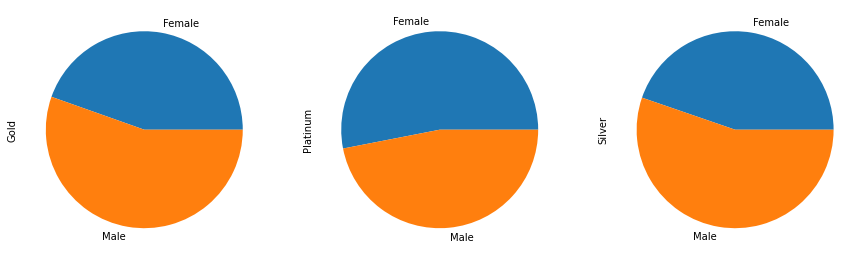

In [22]:
res.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [23]:
f2 = cust_final.loc[(cust_final.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
f2

,gender,CountOf_gender
0,Female,221
1,Male,280


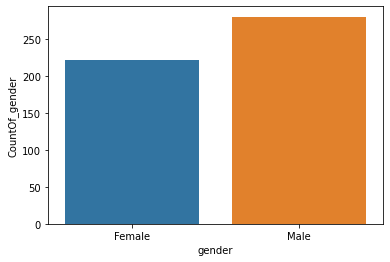

In [24]:
sns.barplot(x = "gender", y = "CountOf_gender", data = f2)
plt.show()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [25]:
cust_final.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,AgeGroup
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,154557,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,44,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,263204,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,50,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,34,Adult
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,441097,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,51,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,524545,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,42,Adult


In [26]:
df = cust_final[cust_final["fraudulent"] == "Yes"].groupby("AgeGroup")["fraudulent"].count().add_prefix("count_").reset_index()
df

,AgeGroup,fraudulent
0,count_Adult,187
1,count_Senior,21
2,count_Youth,39


<AxesSubplot:xlabel='AgeGroup', ylabel='fraudulent'>

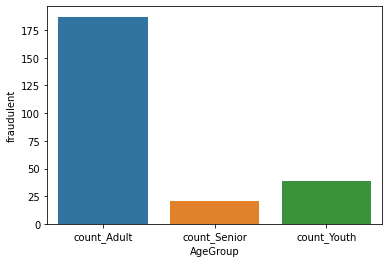

In [27]:
sns.barplot(x = "AgeGroup" , y = "fraudulent" ,data = df )

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [28]:
cust_final["Clain_month"] = pd.to_datetime(cust_final.claim_date).dt.month
cust_final

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,AgeGroup,Clain_month
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,154557,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,44,Adult,4
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,263204,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,50,Adult,4
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,34,Adult,10
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,441097,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,51,Adult,3
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,524545,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,42,Adult,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Male,1965-01-28,UT,5.175625e+09,Silver,4549014,99674324,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,0.0,57,Adult,7
1074,Female,1966-06-19,HI,4.577521e+09,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1.0,56,Adult,1
1075,Female,1963-11-18,NC,6.432465e+09,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,0.0,59,Adult,4
1076,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,99892000,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,0.0,27,Youth,11


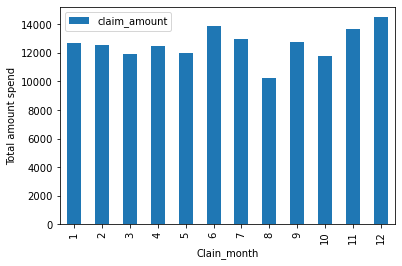

In [29]:
pd.pivot_table(data = cust_final, values = 'claim_amount',index =  'Clain_month').plot(kind = 'bar')
plt.ylabel('Total amount spend')
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [30]:
v = pd.DataFrame(cust_final.loc[(cust_final.fraudulent=="Yes")].groupby(["gender","age","fraudulent"]).mean()["claim_amount"].add_prefix("Fraud_"))
v

claim_amount
gender       age      fraudulent              
Fraud_Female Fraud_23 Fraud_Yes    2915.250000
             Fraud_24 Fraud_Yes    1523.750000
             Fraud_25 Fraud_Yes   15893.000000
             Fraud_26 Fraud_Yes    4727.625488
             Fraud_27 Fraud_Yes   20019.167969
...                                        ...
Fraud_Male   Fraud_58 Fraud_Yes    6336.500000
             Fraud_59 Fraud_Yes   40135.000000
             Fraud_60 Fraud_Yes   10067.099609
             Fraud_61 Fraud_Yes   44367.000000
             Fraud_62 Fraud_Yes   20165.250000

[77 rows x 1 columns]

In [31]:
u = pd.DataFrame(cust_final.loc[(cust_final.fraudulent=="Yes")].groupby(["gender","age","fraudulent"]).mean()["claim_amount"].add_prefix("Fraud_"))
u

claim_amount
gender       age      fraudulent              
Fraud_Female Fraud_23 Fraud_Yes    2915.250000
             Fraud_24 Fraud_Yes    1523.750000
             Fraud_25 Fraud_Yes   15893.000000
             Fraud_26 Fraud_Yes    4727.625488
             Fraud_27 Fraud_Yes   20019.167969
...                                        ...
Fraud_Male   Fraud_58 Fraud_Yes    6336.500000
             Fraud_59 Fraud_Yes   40135.000000
             Fraud_60 Fraud_Yes   10067.099609
             Fraud_61 Fraud_Yes   44367.000000
             Fraud_62 Fraud_Yes   20165.250000

[77 rows x 1 columns]

In [32]:
Cust_age_gender=round(pd.merge(u,v, on=["gender","age"]),2)
Cust_age_gender

claim_amount_x  claim_amount_y
gender       age                                     
Fraud_Female Fraud_23     2915.250000     2915.250000
             Fraud_24     1523.750000     1523.750000
             Fraud_25    15893.000000    15893.000000
             Fraud_26     4727.629883     4727.629883
             Fraud_27    20019.169922    20019.169922
...                               ...             ...
Fraud_Male   Fraud_58     6336.500000     6336.500000
             Fraud_59    40135.000000    40135.000000
             Fraud_60    10067.099609    10067.099609
             Fraud_61    44367.000000    44367.000000
             Fraud_62    20165.250000    20165.250000

[77 rows x 2 columns]

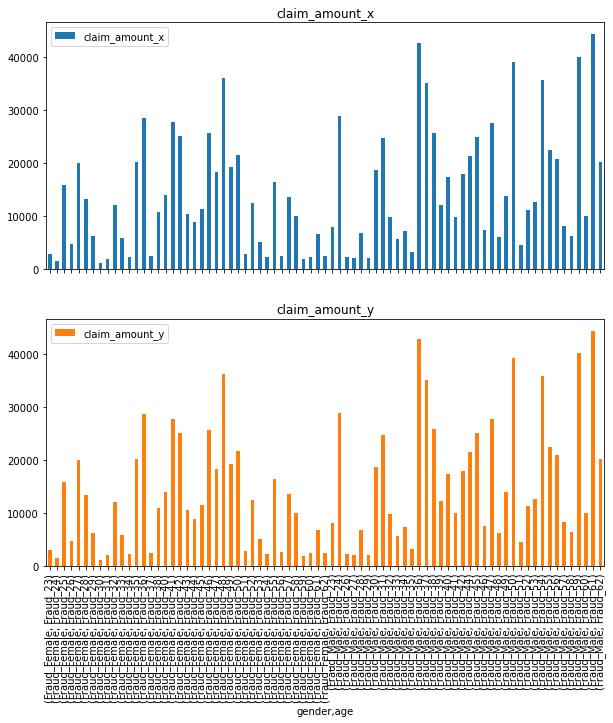

In [33]:
Cust_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

## 16. Is there any similarity in the amount claimed by males and females?
1. Define Null Hypothesis, H0:
H0 = No similarity b/w amount claimed by males & females

2. Define Alternate Hypothesis, Ha:
Ha = There is a similarity b/w amount claimed by males & females

3. Define CI :
CI= 95%, pvalue = 0.05

4. Perform test:
T-test

In [34]:
claim_male = cust_final['claim_amount'].loc[cust_final['gender']=="Male"]
claim_female = cust_final['claim_amount'].loc[cust_final['gender']=="Female"]

In [35]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12822.81640625
The average amount claimed by females is 12102.1357421875


### Assumptions : 
### Two sample t-test:
### To conduct a valid test: (Assumptions for two sample t-test)
### * Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
### * Data in each group must be obtained via a random sample from the population.
### * Data in each group are normally distributed.
### * Data values are continuous.
### * The variances for the two independent groups are equal.

In [36]:
import scipy.stats as stats
#checking the variance

eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic

0.8848699385883664

In [37]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # equal variance
uneq_var.statistic

0.8855037825752392

In [38]:
#The t score of the variables is very similar thus we will consider it as equal variance
t= eq_var.statistic
p= eq_var.pvalue

print("For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')


For the above test, the t-score is 0.8848699385883664 and the p-value is 0.37642447095092635
We fail to reject null hypothesis


## 17.Is there any relationship between age category and segment?
1. Define Null Hypothesis, H0:
H0 = No relationship b/w age category and segment

2. Define Alternate Hypothesis, Ha:
Ha = yes relationship b/w age category and segment

3. Define CI :
CI= 95%, pvalue = 0.05

4. Perform test:
Chi-Squared Test on crosstab, called observed freq. table

In [39]:
#### Crosstab:
obs_freq = pd.crosstab(cust_final.AgeGroup, cust_final.Segment)
obs_freq

Segment,Gold,Platinum,Silver
AgeGroup,,,
Adult,272,266,257
Senior,28,26,21
Youth,71,69,68


In [40]:
stats.chi2_contingency(obs_freq)

(0.6654696397990999,
 0.9555179463691874,
 4,
 array([[273.6038961 , 266.22912801, 255.16697588],
        [ 25.81168831,  25.11595547,  24.07235622],
        [ 71.58441558,  69.65491651,  66.7606679 ]]))

5. Conclusion:
As obs_freq table & expected_freq_table has similar values, it means region & segment are independent.

initial p-value = 0.05 new p-value = 0.9555179463691874,

      Since new pvalue > initial pvalues, we will Accept H0.

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.
1. Define Null Hypothesis, H0:
H0 = No relationship b/w claim amount and fiscal average 2016-17 

2. Define Alternate Hypothesis, Ha:
Ha = yes there is relationship b/w claim amount and fiscal average 2016-17 

3. Define CI :
CI= 95%, pvalue = 0.05

4. Perform test:
t Test

In [41]:
comb_df_new =  cust_final.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()

In [42]:
comb_df_new['Monthly'] = comb_df_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
comb_df_new['Yearly'] = comb_df_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
comb_df_new

,claim_date,claim_amount,Monthly,Yearly
0,2017-01-01,203227.0,January,2017
1,2017-01-07,137763.5,January,2017
2,2017-01-14,138807.5,January,2017
3,2017-01-21,72576.5,January,2017
4,2017-01-27,57928.0,January,2017
...,...,...,...,...
95,2018-10-03,162797.5,October,2018
96,2018-10-09,225007.5,October,2018
97,2018-10-16,119829.0,October,2018
98,2018-10-23,147084.0,October,2018


In [43]:
comb_df_new_2017 = comb_df_new.loc[ comb_df_new.Yearly == '2017', 'claim_amount' ].mean()
print( comb_df_new_2017 )

133465.859375


In [44]:
comb_df_new_2018 = comb_df_new.loc[ comb_df_new.Yearly == '2018', 'claim_amount' ]

In [45]:
stats.ttest_1samp( comb_df_new_2018, 100000 )

Ttest_1sampResult(statistic=4.623132209540581, pvalue=3.310963329742883e-05)

Hence We reject the H0 Business Conclusion: Spend on the Insurance Claims has increased from last year spend of $100,000

## 19.Is there any difference between age groups and insurance claims
1. Define Null Hypothesis, H0:
H0 = mean(AgeGroup[Youth]) == mean(AgeGroup[Adult]) (No difference between age groups and insurance claims 

2. Define Alternate Hypothesis, Ha:
Ha =mean(AgeGroup[Youth]) != mean(AgeGroup[Adult])( There is some difference between age groups and insurance claims or there is some influence of age groups on insurance claims)

3. Define CI :
CI= 95%, pvalue = 0.05

4. Perform test:
f Test

In [46]:
cust_final.AgeGroup.nunique()

3

In [47]:
cust_final.AgeGroup.value_counts()

Adult     795
Youth     208
Senior     75
Name: AgeGroup, dtype: int64

In [48]:
Claims = 'claim_amount'

In [49]:
s1 = cust_final.loc[ cust_final.AgeGroup == 'Adult', Claims ]
s2 = cust_final.loc[ cust_final.AgeGroup == 'Youth', Claims ]
s3 = cust_final.loc[ cust_final.AgeGroup == 'Senior', Claims ]
print( 'Count s1:', s1.mean(), '| Count s2:', s2.mean(), '| Count s3:', s3.mean() )

Count s1: 12650.75 | Count s2: 11848.7646484375 | Count s3: 12284.2001953125


In [50]:
stats.f_oneway( s1, s2, s3, s4 )

NameError: name 's4' is not defined

 Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no difference between age groups and insurance claims

## 20. Is there any relationship between total number of policy claims and the claimed amount?
1. Define Null Hypothesis, H0:
H0 = No relationship between total number of policy claims and claims amount

2. Define Alternate Hypothesis, Ha:
Ha =There is some relationship between total number of policy claims and insurance claims amount
3. Define CI :
CI= 95%, pvalue = 0.05

4. Perform test:
f Test

In [ ]:
cust_final.total_policy_claims.value_counts()

In [ ]:
cust_final.columns

In [ ]:
usage = 'claim_amount'

In [ ]:
d1 = cust_final.loc[cust_final.total_policy_claims == 1, usage]
d2 = cust_final.loc[cust_final.total_policy_claims == 2, usage]
d3 = cust_final.loc[cust_final.total_policy_claims == 3, usage]
d4 = cust_final.loc[cust_final.total_policy_claims == 4, usage]
d5 = cust_final.loc[cust_final.total_policy_claims == 5, usage]
d6 = cust_final.loc[cust_final.total_policy_claims == 6, usage]
d7 = cust_final.loc[cust_final.total_policy_claims == 7, usage]
d8 = cust_final.loc[cust_final.total_policy_claims == 8, usage]
print( 'Count d1:', d1.mean(), '| Count d2:', d2.mean(), '| Count d3:', d3.mean() ,'| Count d4:', d4.mean(),'| Count d5:', d5.mean(),'| Count d6:', d6.mean(),'| Count d7:', d7.mean(),'| Count d8:', d8.mean() )

In [ ]:
stats.f_oneway(d1,d2,d3,d4,d5,d6,d7,d8)

 Business conclusion: Pvalue is < 0.05. Hence we will reject Null Hypothesis H0 and There is difference between policy claims and claim amount